# 0.2.0 The Bias-Variance Tradeoff

In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.ensemble import VotingClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [13]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

# Set SEED for reproducibility
SEED = 1

## 0.2.2 Complexity, bias and variance

how the complexity of a model labeled (f) influences the bias and variance terms of its generalization error.
Which of the following correctly describes the relationship between (f)'s complexity and (f)'s bias and variance terms?

R:/ As the complexity of (f) increases, the bias term decreases while the variance term increases.

## 0.2.3 Overfitting and underfitting

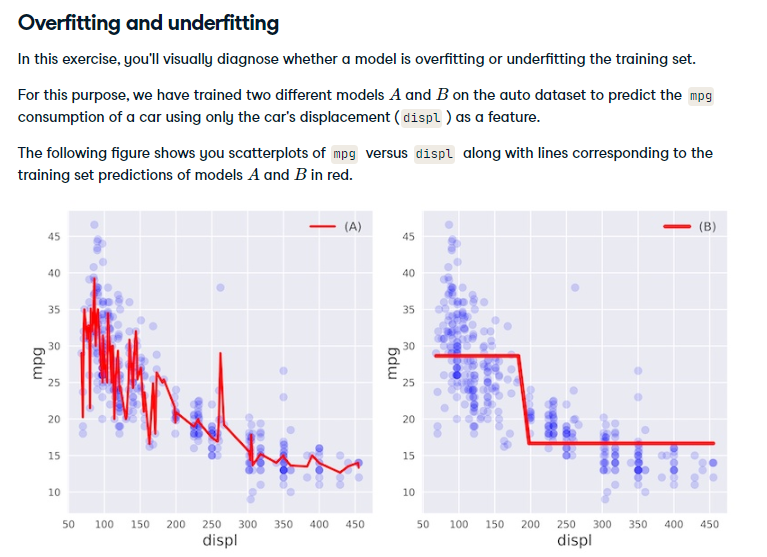

Which of the following statements is true?

R:/ Model B suffers from high bias and underfits the training set. Model B is not able to capture the nonlinear dependence of mpg on displ.

## 0.2.5 Instantiate the model

In [6]:
auto = pd.read_csv(path.data_raw_dir("auto.csv"), encoding = 'utf-8')
#wbc.drop(['Unnamed: 32'], axis=1, inplace=True)
#wbc['diagnosis'] = np.where(wbc['diagnosis'] == 'B', 1, 0)
auto = pd.get_dummies(data=auto, columns=['origin'])
auto.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [7]:
X = auto.loc[:,['displ','hp','weight','accel','size','origin_Asia','origin_Europe','origin_US']]
y = auto['mpg'].values

In [9]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

## 0.2.6 Evaluate the 10-fold CV error

In [11]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv= 10, scoring='neg_mean_squared_error', n_jobs = -1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


## 0.2.7 Evaluate the training error

In [12]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


## 0.2.8 High bias or high variance?

Does dt suffer from a high bias or a high variance problem?

R:/ dt suffers from high bias because RMSE_CV  RMSE_train and both scores are greater than baseline_RMSE. dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

## 0.2.9 Define the ensemble

In [16]:
# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

In [23]:
# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

## 0.2.10 Evaluate individual classifiers

In [32]:
indian = pd.read_csv(path.data_raw_dir("indian_liver_patient_preprocessed.csv"), encoding = 'utf-8')
indian.drop(['Unnamed: 0'], axis=1, inplace=True)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [34]:
X = indian.drop("Liver_disease", axis=1)
y = indian['Liver_disease'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [36]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.759
K Nearest Neighbours : 0.701
Classification Tree : 0.730


## 0.2.11 Better performance with a Voting Classifier

In [39]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)    

In [40]:
# Fit vc to the training set
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(random_state=1)),
                             ('K Nearest Neighbours',
                              KNeighborsClassifier(n_neighbors=27)),
                             ('Classification Tree',
                              DecisionTreeClassifier(min_samples_leaf=0.13,
                                                     random_state=1))])

In [41]:
# Evaluate the test set predictions
y_pred = vc.predict(X_test)

In [42]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred) 
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


In [42]:
print('ok_')

ok_
